In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

In [2]:
from google.colab import files
uploaded = files.upload()

Saving dataset_train.xlsx to dataset_train.xlsx


In [3]:
df = pd.read_excel('dataset_train.xlsx')

In [4]:
df.head()

,Temperatur Udara (°C),Kecepatan Angin (km/jam),Klasifikasi atau Persepsi Marry
0,10,0,Dingin
1,25,0,Panas
2,15,5,Dingin
3,20,3,Panas
4,18,7,Dingin


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Temperatur Udara (°C)            8 non-null      int64 
 1   Kecepatan Angin (km/jam)         8 non-null      int64 
 2   Klasifikasi atau Persepsi Marry  8 non-null      object
dtypes: int64(2), object(1)
memory usage: 324.0+ bytes


In [6]:
X = df[['Temperatur Udara (°C)', 'Kecepatan Angin (km/jam)']]
y = df['Klasifikasi atau Persepsi Marry']

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_enc = le.fit_transform(y)

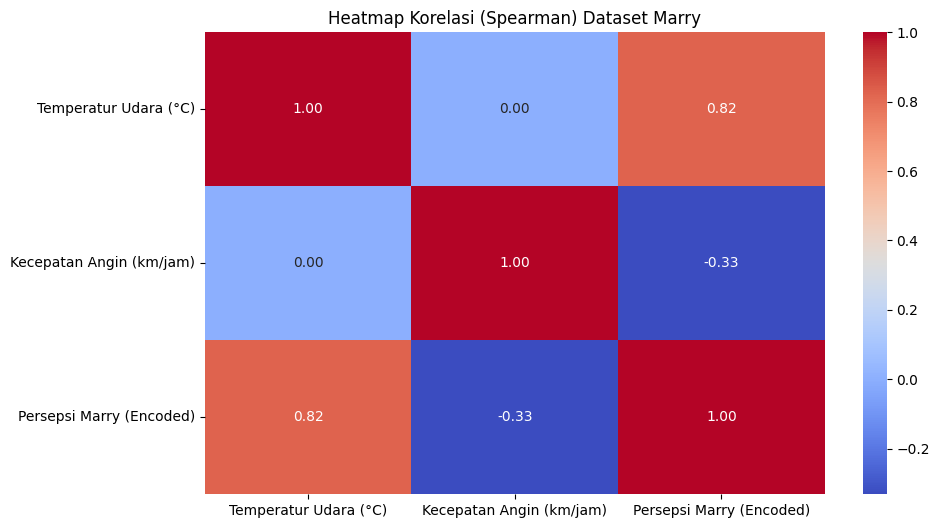

In [8]:
df_corr = X.copy()
df_corr['Persepsi Marry (Encoded)'] = y_enc

correlation_matrix = df_corr.corr(method='spearman')

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap Korelasi (Spearman) Dataset Marry")
plt.show()

In [9]:
model = KNeighborsClassifier(n_neighbors=3)   # k=3 contoh
model.fit(X, y_enc)

KNeighborsClassifier(n_neighbors=3)

In [10]:
pred = model.predict([[16, 3]])
print("Hasil prediksi dari panas dan dinginyaa cuaca hari ini adalah :",
      le.inverse_transform(pred)[0])

Hasil prediksi dari panas dan dinginyaa cuaca hari ini adalah : Dingin


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
